In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

df = pd.read_csv('./Most_Streamed_Spotify_Songs_2024.csv',encoding='latin1')

#We drop the column for the TIDAL popularity since it containts mostly missing values
df = df.drop('TIDAL Popularity',axis=1)

#Filling missing columns of Spotify Streams, Spotify Playlist Count and Spotify Playlist Reach with 0s
df[['Spotify Streams','Spotify Playlist Count', 'Spotify Playlist Reach']] = df[['Spotify Streams','Spotify Playlist Count', 'Spotify Playlist Reach']].fillna('0')

#Converting the columns of Spotify Streams, Spotify Playlist Count and Spotify Playlist Reach from strings to integersdf[['Spotify Streams','Spotify Playlist Count', 'Spotify Playlist Reach']] = df[['Spotify Streams','Spotify Playlist Count', 'Spotify Playlist Reach']].str.replace(',','').astype(int)
df['Spotify Streams'] = df['Spotify Streams'].str.replace(',','').astype(int)
df['Spotify Playlist Count'] = df['Spotify Playlist Count'].str.replace(',','').astype('int')
df['Spotify Playlist Reach'] = df['Spotify Playlist Reach'].str.replace(',','').astype('int')

df


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,390470936,30716,196631588,...,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,323703884,28113,174597137,...,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,601309283,54331,211607669,...,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,2031280633,269802,136569078,...,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,107034922,7223,151469874,...,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,305049963,65770,5103054,...,6,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,52282360,4602,1449767,...,412,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,189972685,72066,6704802,...,204,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,145467020,14037,7387064,...,"1,200",NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",0


<h1 style='font-family:monospace; font:bold'>Top 5 most streamed songs on Spotify for 2024 🎶</h1>
<p style='font-family:monospace; font:bold'> In this section, I am curious in finding out the top 5 most streamed songs on the spotify app.</p>

In [ ]:
# Observe only the tracks and the quantity of their streams
df_top_tracks = df[['Track','Spotify Streams']].copy()

# Combine all the streams for the same songs
df_top_tracks = df_top_tracks.groupby(['Track'],as_index=False).sum()
df_top_tracks = df_top_tracks.sort_values(by='Spotify Streams',ascending=False)


df_top_tracks = df_top_tracks.reset_index()
df_top_tracks.drop(columns='index',inplace=True)
df_top_tracks

,Track,Spotify Streams
0,Danza Kuduro - Cover,21394450048
1,Cake By The Ocean - Cover,12935245210
2,Blinding Lights,8542796910
3,Shape of You,7797815151
4,As It Was,6601375963
...,...,...
4365,Cuando Te Amï¿,0
4366,Me Porto Bonito - Remix,0
4367,Spokojnie,0
4368,writhe,0


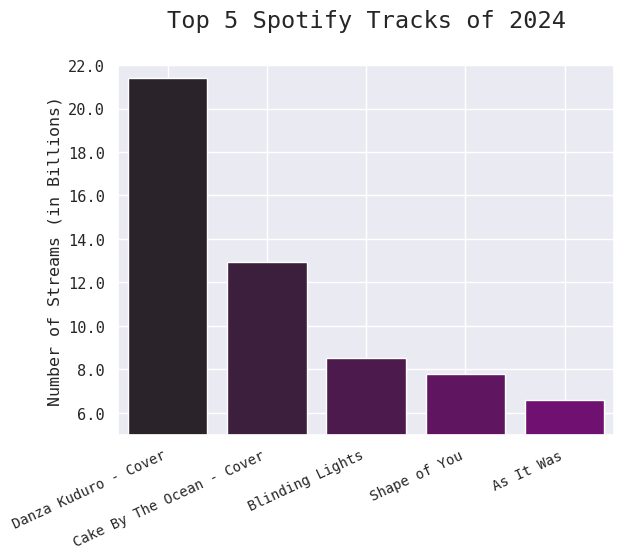

In [113]:
#Obtaining the top 5 most streamed tracks for 2024 on Spotify
df_top5_tracks = df_top_tracks[:5]
fig,ax = plt.subplots()
sns.set_theme(style='dark',font='monospace')
sns.barplot(data=df_top5_tracks,
            x='Track',
            y='Spotify Streams',
            palette='dark:purple',
            hue='Track',
            ax=ax,
            legend=False)
ax.set_title('Top 5 Spotify Tracks of 2024',fontsize=17,y=1.08)
ax.set_ylim((5000000000,22000000000))
ax.yaxis.set_major_formatter(lambda value,pos: str(round(value/1e9 , 1)))
ax.set_xlabel('')
ax.set_ylabel('Number of Streams (in Billions)', fontsize=12)
plt.grid()
plt.xticks(rotation=25,ha='right',fontsize=10)
plt.show()

<h1 style='font-family:monospace; font:bold'> Most listened-to artists of Spotify in 2025 </h1>

In [ ]:
df_artists = df[['Artist','Spotify Streams']].copy()
df_artists = df_artists.groupby(['Artist']).sum()
df_artists = df_artists.sort_values

,Spotify Streams
Artist,
"""XY""",0
$OHO BANI,54065563
$uicideboy$,1697447430
&ME,34601626
(G)I-DLE,876938452
...,...
ýýýýýýýýýýýýýýý ýýýýýýýýýýýýýýý,2409532
ýýýýýýýýýýýýýýý(ýýýýýýýýýýýýýýý),548408
ýýýýýýýýýýýýýýýýýý,4943057
